In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 

In [2]:
df = pd.read_csv('CaseStudy.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71391 entries, 0 to 71390
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          71391 non-null  int64 
 1   user_id             71391 non-null  object
 2   active_month        71391 non-null  object
 3   first_payment_date  71391 non-null  object
 4   total_projects      71391 non-null  int64 
 5   culls               71391 non-null  int64 
 6   edits               71391 non-null  int64 
 7   retouchs            71391 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 4.4+ MB
None


,Unnamed: 0,user_id,active_month,first_payment_date,total_projects,culls,edits,retouchs
0,0,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-03,2022-01-20,2,1,1,0
1,1,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-04,2022-01-20,3,2,2,0
2,2,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-05,2022-01-20,1,0,1,0
3,3,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-05,2025-05-01,4,4,4,0
4,4,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-06,2025-05-01,0,0,0,0


In [3]:
df["active_month"] = pd.to_datetime(df["active_month"])
df["first_payment_date"] = pd.to_datetime(df["first_payment_date"])

In [4]:
df = df.sort_values(by=["user_id","active_month"])

In [5]:
df['tenure_month'] = ( df['active_month'].dt.to_period('M') - df['first_payment_date'].dt.to_period('M') ).apply(lambda x:x.n)+1
df["next_active_month"] = df.groupby("user_id")["active_month"].shift(-1)
df["month_gap_to_next"] = ( df['next_active_month'].dt.to_period('M') - df['active_month'].dt.to_period('M') ).apply(lambda x:x.n if pd.notnull(x) else np.nan)
df["churn_flag"] = np.where( (df["next_active_month"].isna()) | (df["month_gap_to_next"]>=2) ,1,0)
df.head(20)

,Unnamed: 0,user_id,active_month,first_payment_date,total_projects,culls,edits,retouchs,tenure_month,next_active_month,month_gap_to_next,churn_flag
0,0,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-03-01,2022-01-20,2,1,1,0,39,2025-04-01,1.0,0
1,1,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-04-01,2022-01-20,3,2,2,0,40,2025-05-01,1.0,0
2,2,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-05-01,2022-01-20,1,0,1,0,41,NaT,NaN,1
3,3,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-05-01,2025-05-01,4,4,4,0,1,2025-06-01,1.0,0
4,4,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-06-01,2025-05-01,0,0,0,0,2,NaT,NaN,1
5,5,00aL57603iPJPYsVTa398qmCNzf2,2024-01-01,2024-01-10,3,0,3,0,1,2024-02-01,1.0,0
6,6,00aL57603iPJPYsVTa398qmCNzf2,2024-02-01,2024-01-10,1,0,1,0,2,2024-03-01,1.0,0
7,7,00aL57603iPJPYsVTa398qmCNzf2,2024-03-01,2024-01-10,2,0,2,0,3,2024-04-01,1.0,0
8,8,00aL57603iPJPYsVTa398qmCNzf2,2024-04-01,2024-01-10,1,0,1,0,4,2024-05-01,1.0,0
9,9,00aL57603iPJPYsVTa398qmCNzf2,2024-05-01,2024-01-10,2,0,2,0,5,2024-06-01,1.0,0


In [6]:
len(df[df["churn_flag"]==1])/len(df) #Churn rate

0.19250325671303106

In [7]:
print(f"Active users by tenure")
print(f"First paid month - Month 1 : {df[df["tenure_month"]==1].shape[0]}") #first paid month
print(f"Month 2 : {df[df["tenure_month"]==2].shape[0]} ,{100*df[df["tenure_month"]==2].shape[0]/df[df["tenure_month"]==1].shape[0]}% of Month 1 ")
print(f"Month 3 : {df[df["tenure_month"]==3].shape[0]} ,{100*df[df["tenure_month"]==3].shape[0]/df[df["tenure_month"]==1].shape[0]}%")
print(f"Month 4 : {df[df["tenure_month"]==4].shape[0]} ,{100*df[df["tenure_month"]==4].shape[0]/df[df["tenure_month"]==1].shape[0]}%")
print(f"Month 5 : {df[df["tenure_month"]==5].shape[0]} ,{100*df[df["tenure_month"]==5].shape[0]/df[df["tenure_month"]==1].shape[0]}%")
print(f"Month 6 : {df[df["tenure_month"]==6].shape[0]} ,{100*df[df["tenure_month"]==6].shape[0]/df[df["tenure_month"]==1].shape[0]}%")
print(f"Month 7 : {df[df["tenure_month"]==6].shape[0]} ,{100*df[df["tenure_month"]==7].shape[0]/df[df["tenure_month"]==1].shape[0]}%")
print(f"Month 8 : {df[df["tenure_month"]==6].shape[0]} ,{100*df[df["tenure_month"]==8].shape[0]/df[df["tenure_month"]==1].shape[0]}%")

Active users by tenure
First paid month - Month 1 : 8344
Month 2 : 6933 ,83.08964525407478% of Month 1 
Month 3 : 5584 ,66.92233940556088%
Month 4 : 4577 ,54.85378715244487%
Month 5 : 3943 ,47.25551294343241%
Month 6 : 3409 ,40.855704697986575%
Month 7 : 3409 ,35.941994247363375%
Month 8 : 3409 ,33.125599232981784%


In [8]:
print(f"Churn rate by tenure")
print(f"Overall Churn rate : {100*len(df[df["churn_flag"]==1])/len(df) }%")
print(f"Tenure 1-3 : {100*len( df[ (df["tenure_month"].isin([1,2,3])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([1,2,3])])}%")
print(f"Tenure 4-12 : {100*len( df[(df["tenure_month"]>=4) & (df["tenure_month"]<=12) & (df["churn_flag"]==1) ] )/len(df[(df["tenure_month"]>=4) & (df["tenure_month"]<=12)])}%")

Churn rate by tenure
Overall Churn rate : 19.250325671303106%
Tenure 1-3 : 23.474425962322037%
Tenure 4-12 : 16.762108841024126%


In [9]:
print(f"Churn in 1st Month : {100*len( df[ (df["tenure_month"].isin([1])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([1])])}")
print(f"Churn in 2nd Month : {100*len( df[ (df["tenure_month"].isin([2])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([2])])}")
print(f"Churn in 3rd Month : {100*len( df[ (df["tenure_month"].isin([3])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([3])])}")
print(f"Churn in 4th Month : {100*len( df[ (df["tenure_month"].isin([4])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([4])])}")
print(f"Churn in 5th Month : {100*len( df[ (df["tenure_month"].isin([5])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([5])])}")
print(f"Churn in 6th Month : {100*len( df[ (df["tenure_month"].isin([6])) & (df["churn_flag"]==1) ] )/len(df[df["tenure_month"].isin([6])])}")

Churn in 1st Month : 22.363374880153405
Churn in 2nd Month : 24.433867012837155
Churn in 3rd Month : 23.943409742120345
Churn in 4th Month : 20.275289490932927
Churn in 5th Month : 18.995688562008624
Churn in 6th Month : 18.24581988853036


In [10]:
df["used_culls"] = np.where(df["culls"]>0,1,0)
df["used_edits"] = np.where(df["edits"]>0,1,0)
df["used_retouchs"] = np.where(df["retouchs"]>0,1,0)
df["features_used"] = df[["used_culls","used_edits","used_retouchs"]].sum(axis=1)
df.head()

,Unnamed: 0,user_id,active_month,first_payment_date,total_projects,culls,edits,retouchs,tenure_month,next_active_month,month_gap_to_next,churn_flag,used_culls,used_edits,used_retouchs,features_used
0,0,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-03-01,2022-01-20,2,1,1,0,39,2025-04-01,1.0,0,1,1,0,2
1,1,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-04-01,2022-01-20,3,2,2,0,40,2025-05-01,1.0,0,1,1,0,2
2,2,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-05-01,2022-01-20,1,0,1,0,41,NaT,NaN,1,0,1,0,1
3,3,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-05-01,2025-05-01,4,4,4,0,1,2025-06-01,1.0,0,1,1,0,2
4,4,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-06-01,2025-05-01,0,0,0,0,2,NaT,NaN,1,0,0,0,0


In [11]:
print(f"avg projects : {sum(df['total_projects'])/df.shape[0]}")
print(f"Culling usage : {df[df['used_culls']==1].shape[0]/df.shape[0]}")
print(f"editing usage : {df[df['used_edits']==1].shape[0]/df.shape[0]}")
print(f"retouching usage : {df[df['used_retouchs']==1].shape[0]/df.shape[0]}")
print(f"avg features used : {sum(df['features_used'])/df.shape[0]}")

avg projects : 8.775419870852069
Culling usage : 0.6394363435166898
editing usage : 0.7017131010911739
retouching usage : 0.0523875558543794
avg features used : 1.3935370004622432


In [12]:
print(f"avg projects in month 1 : {sum(df.loc[df['tenure_month']==1,'total_projects'])/df[df['tenure_month']==1].shape[0]}")
print(f"avg projects in month 2 : {sum(df.loc[df['tenure_month']==2,'total_projects'])/df[df['tenure_month']==2].shape[0]}")
print(f"avg projects in month 3 : {sum(df.loc[df['tenure_month']==3,'total_projects'])/df[df['tenure_month']==3].shape[0]}")
print(f"avg projects in month 4 : {sum(df.loc[df['tenure_month']==4,'total_projects'])/df[df['tenure_month']==4].shape[0]}")
print(f"avg projects in month 5 : {sum(df.loc[df['tenure_month']==5,'total_projects'])/df[df['tenure_month']==5].shape[0]}")

avg projects in month 1 : 8.455656759348035
avg projects in month 2 : 8.296841194288186
avg projects in month 3 : 7.888610315186247
avg projects in month 4 : 8.175660913261963
avg projects in month 5 : 8.449911235100178


In [13]:
for i in range(1,13):
    print("retouch usage in month {} : {}".format(i,df[(df['used_retouchs']==1) & (df.tenure_month==i)].shape[0] / df[df.tenure_month==i].shape[0] ))

retouch usage in month 1 : 0.08161553211888782
retouch usage in month 2 : 0.0597144093466032
retouch usage in month 3 : 0.04333810888252149
retouch usage in month 4 : 0.034083460782171726
retouch usage in month 5 : 0.039056555921886886
retouch usage in month 6 : 0.037547667937811675
retouch usage in month 7 : 0.03701233744581527
retouch usage in month 8 : 0.037264833574529664
retouch usage in month 9 : 0.043291731669266774
retouch usage in month 10 : 0.05065897858319605
retouch usage in month 11 : 0.053735255570117955
retouch usage in month 12 : 0.06494746895893028


In [14]:
early = df[df['tenure_month'].between(1,3)].copy()
bins = [0,0.5,2.5,5.5,10.5,999]
labels = ['0','1-2','3-5','6-10','11+']
early['project_bucket']=pd.cut(early['total_projects'],bins=bins,labels=labels,include_lowest=True)
early.head(10)

,Unnamed: 0,user_id,active_month,first_payment_date,total_projects,culls,edits,retouchs,tenure_month,next_active_month,month_gap_to_next,churn_flag,used_culls,used_edits,used_retouchs,features_used,project_bucket
3,3,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-05-01,2025-05-01,4,4,4,0,1,2025-06-01,1.0,0,1,1,0,2,3-5
4,4,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-06-01,2025-05-01,0,0,0,0,2,NaT,NaN,1,0,0,0,0,0
5,5,00aL57603iPJPYsVTa398qmCNzf2,2024-01-01,2024-01-10,3,0,3,0,1,2024-02-01,1.0,0,0,1,0,1,3-5
6,6,00aL57603iPJPYsVTa398qmCNzf2,2024-02-01,2024-01-10,1,0,1,0,2,2024-03-01,1.0,0,0,1,0,1,1-2
7,7,00aL57603iPJPYsVTa398qmCNzf2,2024-03-01,2024-01-10,2,0,2,0,3,2024-04-01,1.0,0,0,1,0,1,1-2
21,21,01cmtzRgIzTmNPr2u1hehvTbQEc2,2025-09-01,2025-09-09,9,3,5,4,1,2025-10-01,1.0,0,1,1,1,3,6-10
22,22,01cmtzRgIzTmNPr2u1hehvTbQEc2,2025-10-01,2025-09-09,6,2,1,3,2,NaT,NaN,1,1,1,1,3,6-10
51,51,02WhLoYyvCcRFaKWx2lEsEacCyn2,2025-01-01,2025-01-21,2,2,0,0,1,2025-02-01,1.0,0,1,0,0,1,1-2
52,52,02WhLoYyvCcRFaKWx2lEsEacCyn2,2025-02-01,2025-01-21,2,2,0,0,2,2025-03-01,1.0,0,1,0,0,1,1-2
53,53,02WhLoYyvCcRFaKWx2lEsEacCyn2,2025-03-01,2025-01-21,2,2,0,0,3,2025-04-01,1.0,0,1,0,0,1,1-2


In [15]:
early.groupby('project_bucket')['churn_flag'].mean()

C:\Users\acer\AppData\Local\Temp\ipykernel_9684\3192366374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  early.groupby('project_bucket')['churn_flag'].mean()


project_bucket
0       0.326901
1-2     0.263608
3-5     0.220714
6-10    0.201003
11+     0.189809
Name: churn_flag, dtype: float64

In [16]:
print("0 feature used  - churn rate : ",early[ (early['features_used']==0) & (early['churn_flag']==1) ].shape[0]/early[ (early['features_used']==0) ].shape[0])
print("1 features used  - churn rate : ",early[ (early['features_used']==1) & (early['churn_flag']==1) ].shape[0]/early[ (early['features_used']==1) ].shape[0])
print("2 features used  - churn rate : ",early[ (early['features_used']==2) & (early['churn_flag']==1) ].shape[0]/early[ (early['features_used']==2) ].shape[0])
print("3 features used  - churn rate : ",early[ (early['features_used']==3) & (early['churn_flag']==1) ].shape[0]/early[ (early['features_used']==3) ].shape[0])

0 feature used  - churn rate :  0.32690092165898615
1 features used  - churn rate :  0.20471855842467027
2 features used  - churn rate :  0.20308110557317627
3 features used  - churn rate :  0.431513903192585


In [17]:
early[early['churn_flag']==1].groupby('features_used').agg({'user_id':'nunique'}).reset_index()

,features_used,user_id
0,0,1135
1,1,1099
2,2,2235
3,3,419


In [18]:
early.groupby('features_used')['churn_flag'].mean()

features_used
0    0.326901
1    0.204719
2    0.203081
3    0.431514
Name: churn_flag, dtype: float64

In [19]:
early.groupby('used_edits')['churn_flag'].mean()

used_edits
0    0.298017
1    0.210680
Name: churn_flag, dtype: float64

In [20]:
early.groupby('used_retouchs')['churn_flag'].mean()

used_retouchs
0    0.219883
1    0.451758
Name: churn_flag, dtype: float64

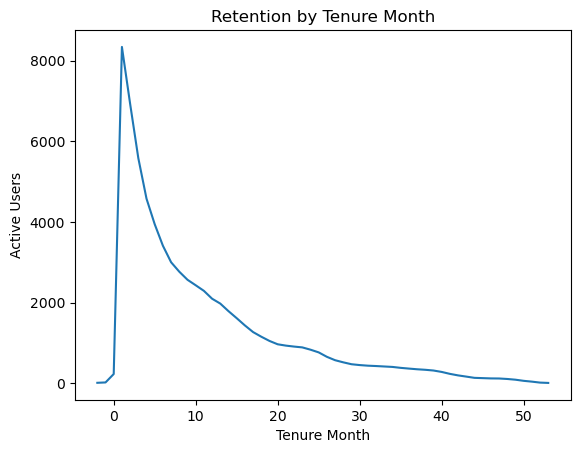

In [21]:
retention = df.groupby('tenure_month')['user_id'].nunique().reset_index(name='active_users')

plt.plot(retention['tenure_month'], retention['active_users'])
plt.title("Retention by Tenure Month")
plt.xlabel("Tenure Month")
plt.ylabel("Active Users")
plt.show()

In [23]:
df.head()

,Unnamed: 0,user_id,active_month,first_payment_date,total_projects,culls,edits,retouchs,tenure_month,next_active_month,month_gap_to_next,churn_flag,used_culls,used_edits,used_retouchs,features_used
0,0,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-03-01,2022-01-20,2,1,1,0,39,2025-04-01,1.0,0,1,1,0,2
1,1,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-04-01,2022-01-20,3,2,2,0,40,2025-05-01,1.0,0,1,1,0,2
2,2,00X5vpkwRjYc30VF2NavgP1b7XO2,2025-05-01,2022-01-20,1,0,1,0,41,NaT,NaN,1,0,1,0,1
3,3,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-05-01,2025-05-01,4,4,4,0,1,2025-06-01,1.0,0,1,1,0,2
4,4,00aDF58d70cbR1wu5EFbf0D0ipq2,2025-06-01,2025-05-01,0,0,0,0,2,NaT,NaN,1,0,0,0,0


In [25]:
df[ (df['total_projects']==0) & (df['tenure_month'].isin([1,2]))]['user_id'].nunique()

1796

In [27]:
df[ (df['total_projects']==0) & (df['tenure_month'].isin([1,2])) & (df['churn_flag']==1) ].shape[0]/ df[ (df['total_projects']==0) & (df['tenure_month'].isin([1,2]))].shape[0]

0.30972154372252075

In [111]:
df[['user_id', 'active_month', 'first_payment_date',
       'total_projects', 'culls', 'edits', 'retouchs', 'tenure_month',
       'next_active_month', 'month_gap_to_next', 'churn_flag', 'used_culls',
       'used_edits', 'used_retouchs', 'features_used']].to_csv('raw.xlx',index=False)

In [110]:
early[['user_id', 'active_month', 'first_payment_date',
       'total_projects', 'culls', 'edits', 'retouchs', 'tenure_month',
       'next_active_month', 'month_gap_to_next', 'churn_flag', 'used_culls',
       'used_edits', 'used_retouchs', 'features_used', 'project_bucket']].to_csv('early.csv',index=False)